
 First few rows of Data set 

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  

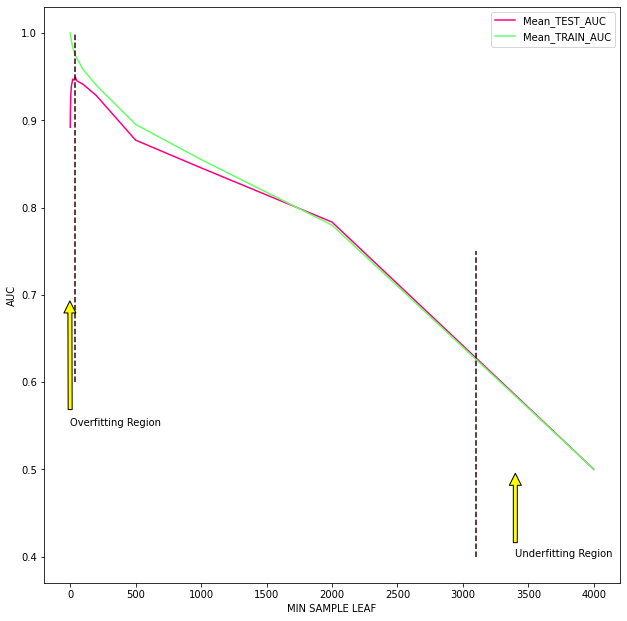

      Mean test AUC  Mean train AUC
1          0.891938        0.999999
2          0.910035        0.999319
5          0.928956        0.995746
10         0.939690        0.990986
15         0.943116        0.986802
20         0.947192        0.983396
30         0.945997        0.978700
40         0.949415        0.973894
50         0.945299        0.971556
100        0.941076        0.957823
200        0.928300        0.940171
500        0.877226        0.895257
1000       0.845460        0.855032
2000       0.783372        0.779859
4000       0.500000        0.500000

 Second Subtask 

    fit_time  score_time  test_score  train_score
0  10.933415    0.009993    0.965723     0.977780
1   6.198683    0.004012    0.955550     0.980184
2   3.177443    0.002972    0.950065     0.975471
3   3.358130    0.004296    0.962544     0.974024
4   3.149445    0.003941    0.958781     0.969066
5   9.968754    0.010984    0.961415     0.982731
6  10.960246    0.009146    0.979980     0.978530
7  11

In [2]:
# Importing the required libraries: numpy, pandas, matplotlib.pyplot and from sklearn package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


# Importing the data set

from sklearn import datasets
dia = datasets.fetch_openml(data_id=44)


# Showing the the first few rows of the Data set

dia_Table = pd.DataFrame(data=dia.data, columns=dia.feature_names)
dia_Table['target'] = dia.target
print('\n First few rows of Data set \n')
print(dia_Table.head())

# Model: First part

from sklearn import tree
from sklearn import model_selection

# Different parameter values

print('First Subtask \n')

Min_Sample_Leaf = [1,2,5,10,15,20,30,40,50,100,200,500,1000,2000,4000]

print('Different values of minimum samples per leaf = (1,2,5,10,15,20,30,40,50,100,200,500,1000,2000,4000)')

# Model: First part

Mean_TEST_AUC = []
Mean_TRAIN_AUC = []
for i in Min_Sample_Leaf:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf=i)
    cv = model_selection.cross_validate(dtc, dia.data, dia.target, scoring=["roc_auc"], cv=10, return_train_score=True)
    print('\n')
    print('This is the result for minimum samples per leaf  = ', i)
    print('\n')
    print(pd.DataFrame(cv))
    print('\n')
    print('Mean TEST AUC:',pd.DataFrame(cv)['test_roc_auc'].mean())
    A=pd.DataFrame(cv)['test_roc_auc'].mean()
    Mean_TEST_AUC.append(A)
    print('Mean TRAIN AUC:',pd.DataFrame(cv)['train_roc_auc'].mean())
    B=pd.DataFrame(cv)['train_roc_auc'].mean()
    Mean_TRAIN_AUC.append(B)
    print('\n\n\n')
    
# Visualization

import matplotlib.pyplot as plt

Z=[40,40,40,40]
Z1=[.6,.90,0.95,1]
W=[1750,1750,1750,1750]
W1=[.5,.90,0.95,1]
V=[3100,3100,3100,3100]
V1=[0.4,.65,.7,.75]

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(Min_Sample_Leaf,Mean_TEST_AUC,color='#FF007F', label="Mean_TEST_AUC")
ax.plot(Min_Sample_Leaf,Mean_TRAIN_AUC,color='#66FF66', label="Mean_TRAIN_AUC")
ax.plot(Z,Z1,color='#330000',linestyle='--')
#ax.plot(W,W1,color='#32CD32',linestyle='--')
ax.plot(V,V1,color='#330000',linestyle='--')
ax.legend()
ax.set_xlabel('MIN SAMPLE LEAF')
ax.set_ylabel('AUC')
ax.annotate('Overfitting Region', xy=(-2, .7), xytext=(.4, .55),
            arrowprops=dict(facecolor='#FFFF00', shrink=0.05))
ax.annotate('Underfitting Region', xy=(3400,.5), xytext=(3400, .4),
            arrowprops=dict(facecolor='#FFFF00', shrink=0.05))
plt.show()

T1 = pd.DataFrame(Mean_TEST_AUC, columns=["Mean test AUC"])
T2= pd.DataFrame(Mean_TRAIN_AUC, columns=["Mean train AUC"])
T3 = pd.concat([T1,T2], axis=1)
LL = [1,2,5,10,15,20,30,40,50,100,200,500,1000,2000,4000]
T3.set_index(pd.Index(LL), inplace=True)
print(T3)



print('\n Second Subtask \n')
from sklearn import datasets
dia = datasets.fetch_openml(data_id=44)
parameters = [{"min_samples_leaf":[1,2,5,10,20,15,20,30,40,50,100,200,500,2000,4000]}]
dtc = tree.DecisionTreeClassifier()
tuned_dtc = model_selection.GridSearchCV(dtc, parameters, scoring="roc_auc", cv=6)
cv = model_selection.cross_validate(tuned_dtc, dia.data, dia.target, scoring="roc_auc", cv=10, return_train_score=True)
cv["test_score"].mean()
H1=pd.DataFrame(cv)
print(H1)
print('\n Mean of the all test score:', cv["test_score"].mean())
H1['test_score'].mean()
tuned_dtc.fit(dia.data, dia.target)
tuned_dtc.best_params_

print('\n The best value for the minimum samples per leaf parameter is', tuned_dtc.best_params_)
